In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [412]:
df=pd.read_csv(r"D:\AI Course\DataScience Degree\survey-results-public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [148]:
df['YearsProgram'].value_counts()

20 or more years    8817
4 to 5 years        3865
3 to 4 years        3701
5 to 6 years        3572
2 to 3 years        3251
9 to 10 years       3197
6 to 7 years        2869
1 to 2 years        2773
7 to 8 years        2466
10 to 11 years      2178
14 to 15 years      2011
8 to 9 years        1910
15 to 16 years      1669
Less than a year    1484
11 to 12 years      1389
12 to 13 years      1307
13 to 14 years      1092
16 to 17 years      1046
19 to 20 years      1021
17 to 18 years       879
18 to 19 years       648
Name: YearsProgram, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [394]:
pd.set_option('display.max_columns',None)

In [6]:
#We want to create a pie chart so we need to inialize the mean of each category in our column
mean_values=[np.round((count_education/df.shape[0])*100,2) for count_education in df['FormalEducation'].value_counts()]
EdLevel_keys=df['FormalEducation'].value_counts().index
print(mean_values)
print(EdLevel_keys)

[42.05, 21.68, 15.82, 11.5, 2.55, 2.16, 2.04, 1.39, 0.83]
Index(['Bachelor's degree', 'Master's degree',
       'Some college/university study without earning a bachelor's degree',
       'Secondary school', 'Doctoral degree', 'I prefer not to answer',
       'Primary/elementary school', 'Professional degree',
       'I never completed any formal education'],
      dtype='object')


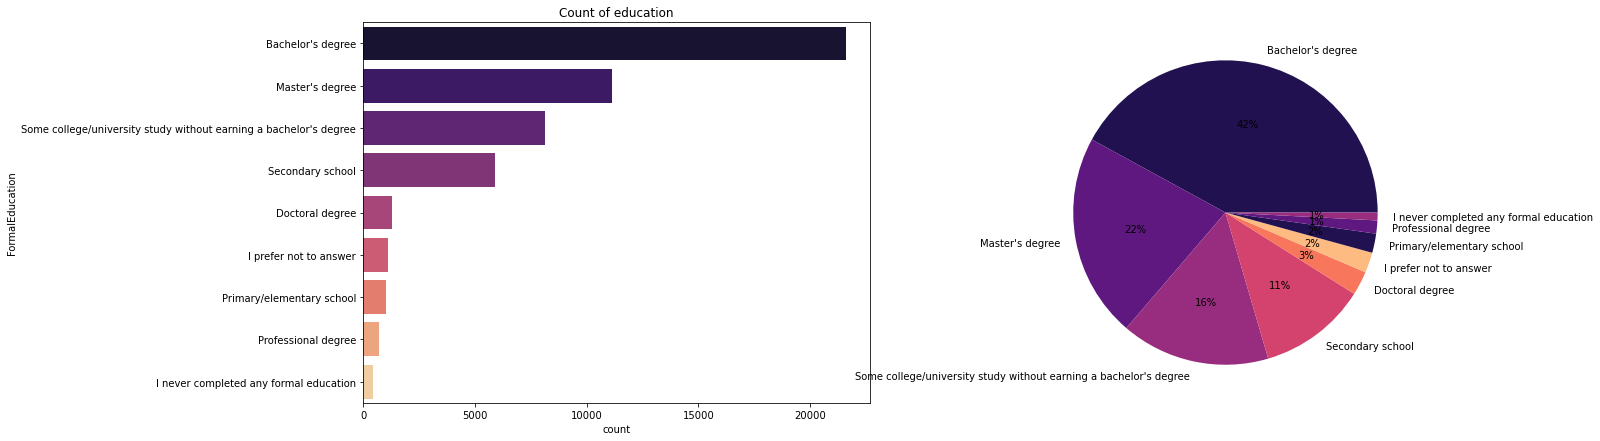

In [220]:
fig,ax=plt.subplots(1,2,figsize=(20,7))

order=df['FormalEducation'].value_counts().sort_values(ascending=False).index #ploting our values in a descending order to make our plot look nicer

sns.countplot(y=df['FormalEducation'] , data=df , palette='magma' , order=order , ax=ax[0]).set(title='Count of education')
ax[1]=plt.pie(mean_values , labels=EdLevel_keys , colors=sns.color_palette('magma') , autopct='%.0f%%')

plt.show()
#most of people in the survey had a bachelors degree then a masters degree

-->>Can we say that people with higher education have more job satisfaction ??

In [227]:
order=df.groupby('FormalEducation')['JobSatisfaction'].mean().sort_values(ascending=False)
print(order)
#-->We can see that the mean value of the JobSatisfaction increases as we go to higer education level 

FormalEducation
Doctoral degree                                                      7.348857
Secondary school                                                     7.143082
Professional degree                                                  7.087459
Some college/university study without earning a bachelor's degree    7.081334
I prefer not to answer                                               7.005682
Primary/elementary school                                            6.956897
Master's degree                                                      6.953151
Bachelor's degree                                                    6.866363
I never completed any formal education                               6.833333
Name: JobSatisfaction, dtype: float64


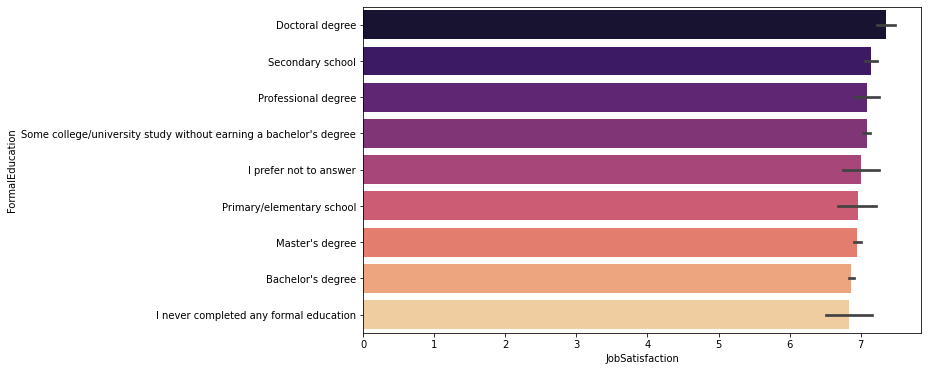

In [228]:
plt.figure(figsize=(10,6))
sns.barplot(y=df['FormalEducation'] , x=df['JobSatisfaction'] , order = order.index , palette='magma')
plt.show()
##People with doctoral degree tend to have the higest JobSatisfaction.
# Can we guess why they have high satisfaction ??

In [41]:
salary_order=df.groupby('FormalEducation')['Salary'].mean().sort_values(ascending=False)
print(salary_order)

FormalEducation
Doctoral degree                                                      78527.933053
Primary/elementary school                                            62677.337356
Master's degree                                                      58250.838766
Bachelor's degree                                                    56914.358553
Some college/university study without earning a bachelor's degree    55912.810459
I never completed any formal education                               44430.660621
Secondary school                                                     40395.148419
Professional degree                                                  39503.658863
I prefer not to answer                                               38284.836141
Name: Salary, dtype: float64


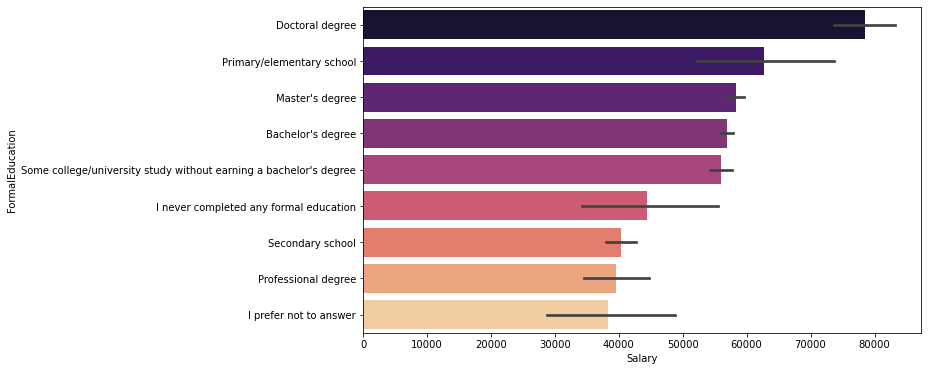

In [226]:
plt.figure(figsize=(10,6))
sns.barplot(y=df['FormalEducation'] , x=df['Salary'] , order=salary_order.index ,palette='magma')
plt.show()
##people with Doctoral degree have the highest salary maybe thats why they have the highest job satisfaction

In [68]:
programm_hobby_order=df['ProgramHobby'].value_counts().sort_values(ascending=False)
print(programm_hobby_order)

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64


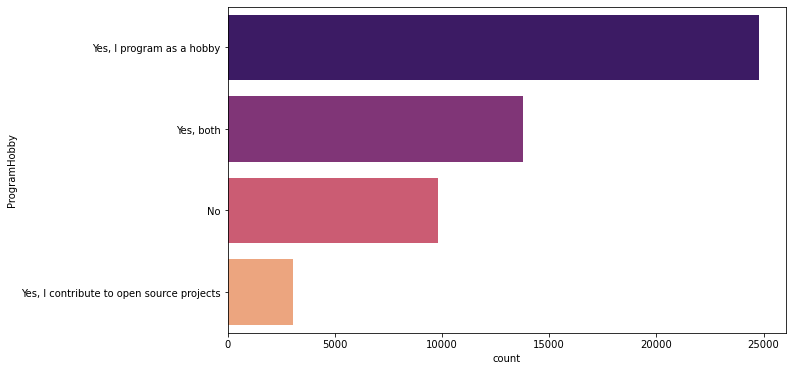

In [229]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['ProgramHobby'] , order=programm_hobby_order.index , palette='magma')
plt.show()
##people program as a hobby are the highest number
#Can we say that they have higher job satisfaction than other people ??
## We can try to plot the relation next

In [79]:
programHobby_sats=df.groupby('ProgramHobby')['JobSatisfaction'].mean().sort_values(ascending=False)
print(programHobby_sats)
## well, we see that people that programm as hobby and contribute to open source projects tend to give better satistfaction

ProgramHobby
Yes, both                                    7.108041
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
No                                           6.833825
Name: JobSatisfaction, dtype: float64


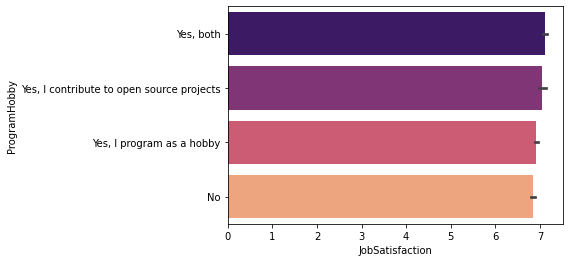

In [230]:
sns.barplot(y=df['ProgramHobby'] , x=df['JobSatisfaction'] , order=programHobby_sats.index , palette='magma')
plt.show()

In [8]:
Salary_hobby=df.groupby('ProgramHobby')['Salary'].mean().sort_values(ascending=False)
print(Salary_hobby)

ProgramHobby
Yes, both                                    60393.567188
Yes, I contribute to open source projects    59019.558827
Yes, I program as a hobby                    54530.681984
No                                           53890.797405
Name: Salary, dtype: float64


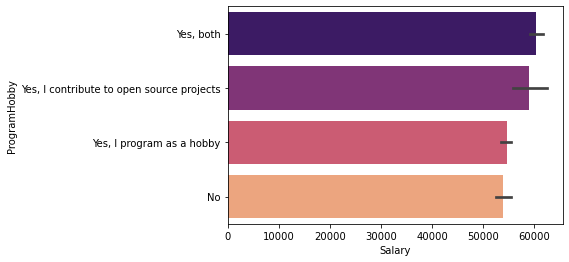

In [9]:
sns.barplot(y=df['ProgramHobby'] , x=df['Salary']  , palette='magma' , order = Salary_hobby.index)
plt.show()
#they also get paid more we see strong correlation here between satisfaction and salary

<AxesSubplot:xlabel='Salary', ylabel='Count'>

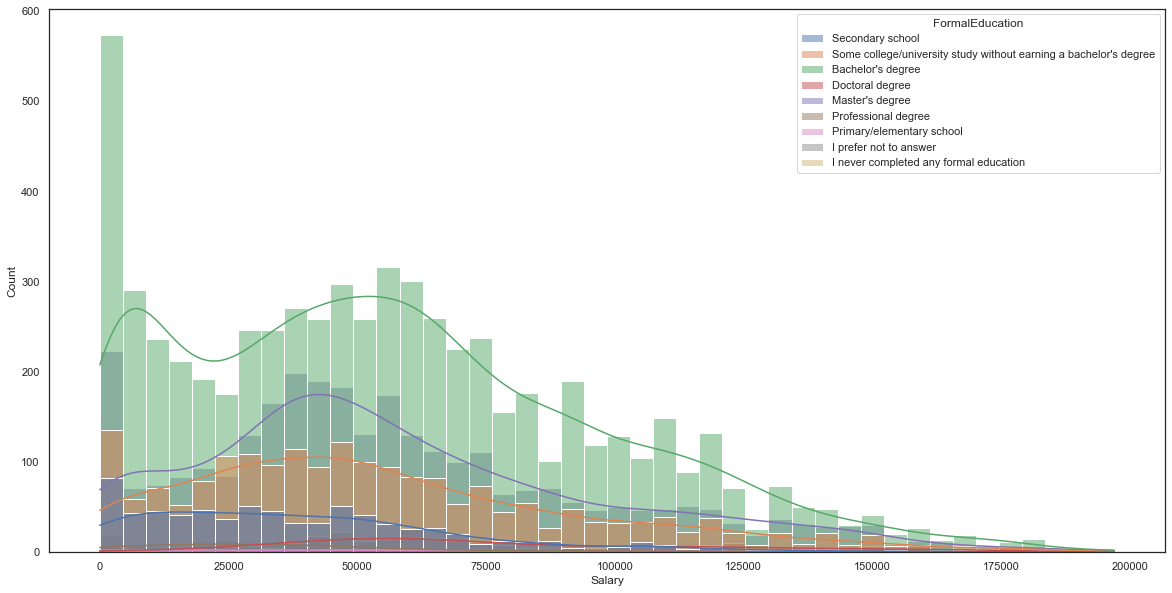

In [113]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['Salary'] , hue=df['FormalEducation'] , kde=True)

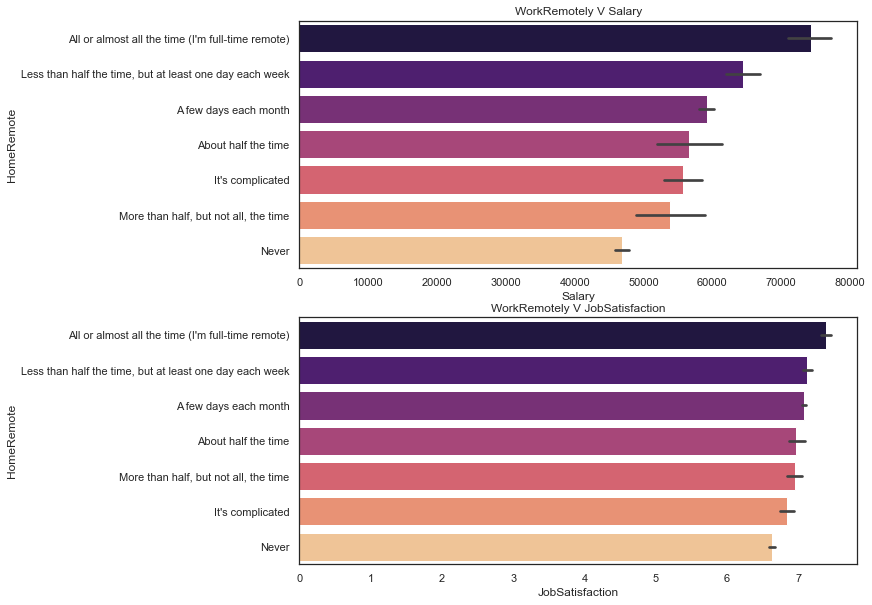

In [104]:
homeRemote_Order1=df.groupby('HomeRemote')['Salary'].mean().sort_values(ascending=False).index 
homeRemote_Order2=df.groupby('HomeRemote')['JobSatisfaction'].mean().sort_values(ascending=False).index 
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.barplot(y=df['HomeRemote'] , x=df['Salary'] ,order=homeRemote_Order1, palette='magma' , ax=ax[0]).set(title='WorkRemotely V Salary')
sns.barplot(y=df['HomeRemote'] ,x=df['JobSatisfaction'] ,order=homeRemote_Order2, palette='magma' ,ax=ax[1]).set(title='\n\nWorkRemotely V JobSatisfaction')
plt.show()
## its obvious that people who work remotely have much higher salary than people who never worked from home
## They aslo have the highest job satisfaction

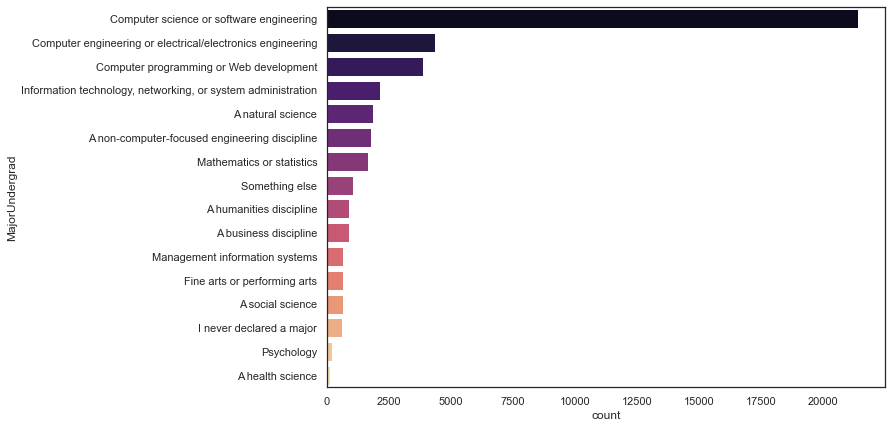

In [91]:
plt.figure(figsize=(10,7))
sns.countplot(y=df['MajorUndergrad'] , order=df['MajorUndergrad'].value_counts().index ,palette='magma')
plt.show()
#We see that most of the people come from a computer science background

In [132]:
def plot_hist(feature,row,column,Target):
    Cat_list=df[feature].value_counts().index ##Creating a list with the categories in each column

    for i,Cat in enumerate(Cat_list):
        ax=plt.subplot(row ,column ,i+1) #Creating subplots
        sns.histplot(df[df[feature]==Cat][Target] , kde=True).set(title=Cat) #ploting a specific category from our feature each iteration 
    plt.show()    

[Text(0.5, 1.0, 'YearsOfExperience V Salary')]

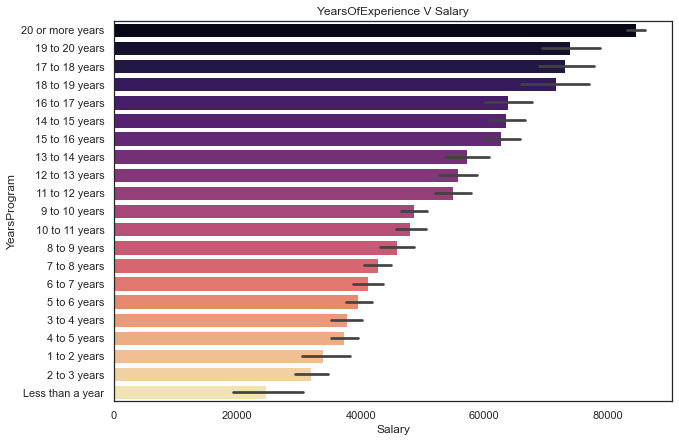

In [156]:
Years_SalaryOrder=df.groupby('YearsProgram')['Salary'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10,7))
sns.barplot(y=df['YearsProgram'] , x=df['Salary'] , order=Years_SalaryOrder , palette='magma').set(title='YearsOfExperience V Salary')
#As the Years of experience increase we find that the salary increase

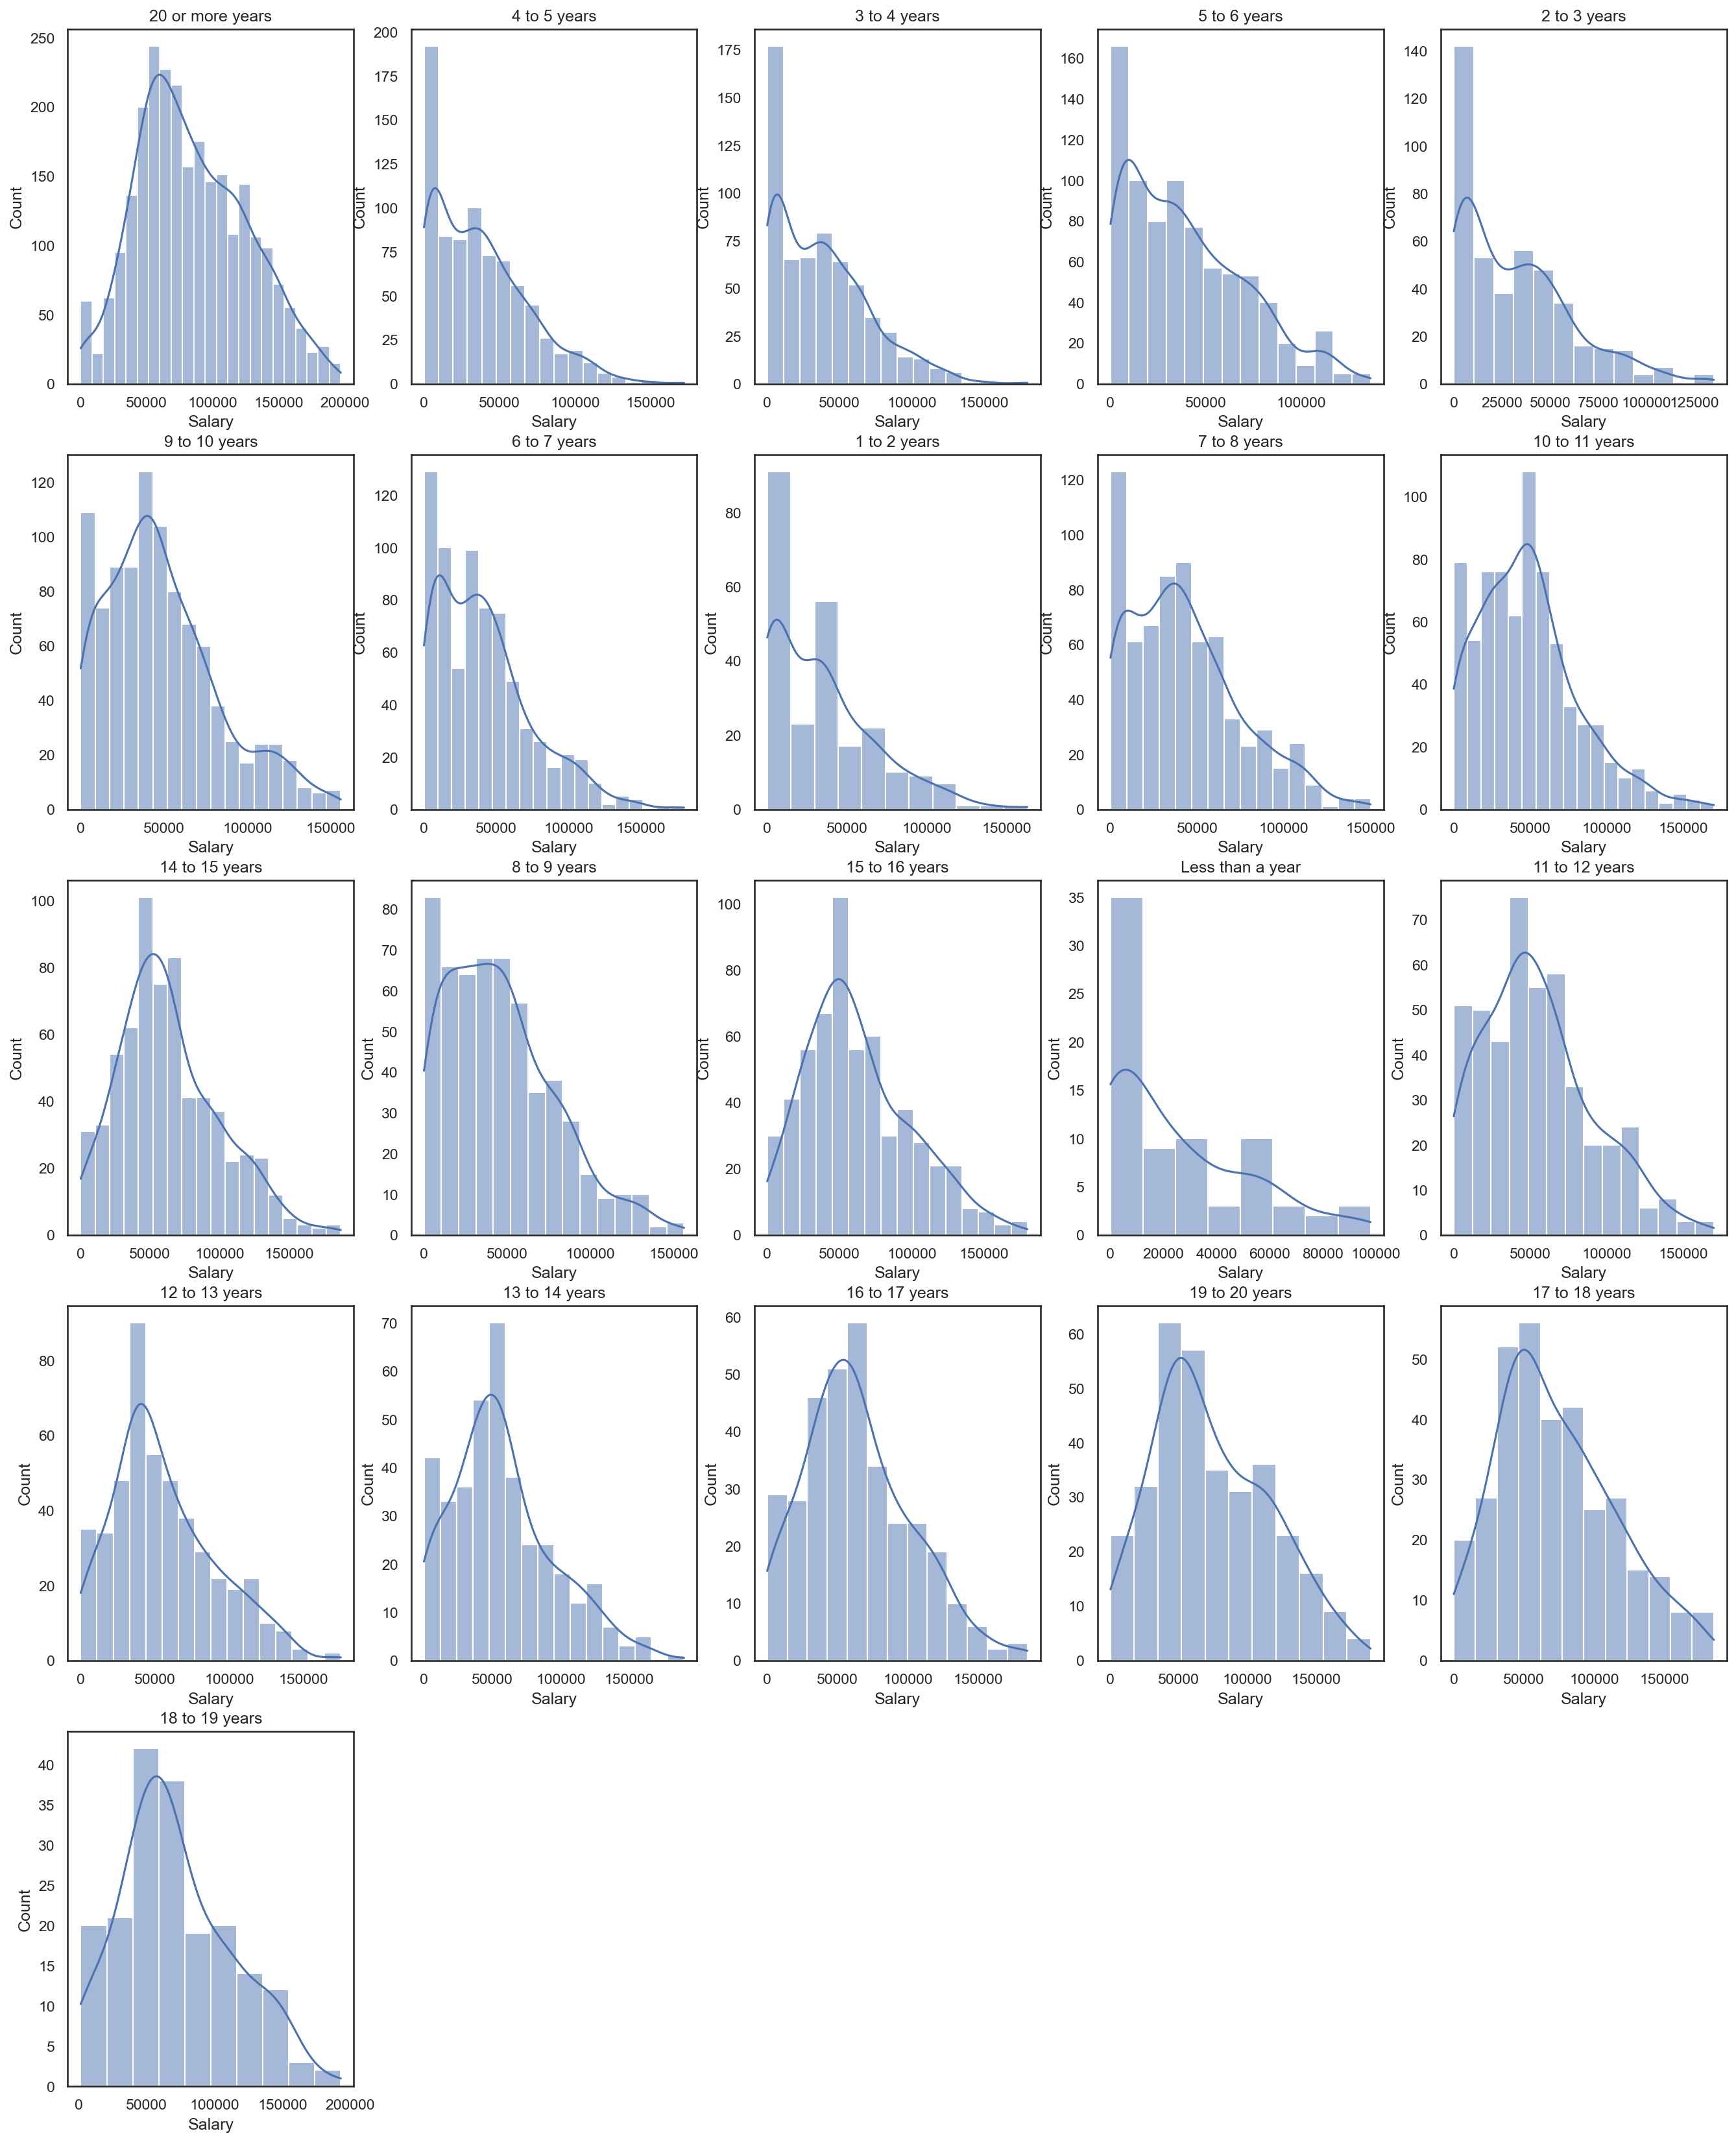

In [150]:
plt.figure(figsize=(22,7*4),dpi=150)
plot_hist(feature='YearsProgram',Target='Salary',row=5,column=5)

In [157]:
df.groupby('MajorUndergrad')['Salary'].mean()

MajorUndergrad
A business discipline                                           67613.345308
A health science                                                53386.363006
A humanities discipline                                         68127.027419
A natural science                                               65908.110996
A non-computer-focused engineering discipline                   62805.509136
A social science                                                71763.452093
Computer engineering or electrical/electronics engineering      55841.762890
Computer programming or Web development                         40919.668076
Computer science or software engineering                        57094.950937
Fine arts or performing arts                                    71446.616378
I never declared a major                                        64237.371671
Information technology, networking, or system administration    45921.675673
Management information systems                               

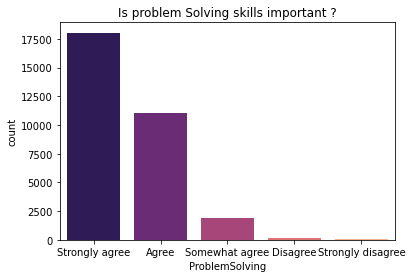

In [428]:
#Can we say that problem solving skills is important
sns.countplot(x=df['ProblemSolving'] , palette='magma').set(title='Is problem Solving skills important ?')
plt.show()
#I guess most of our developers strongly agree

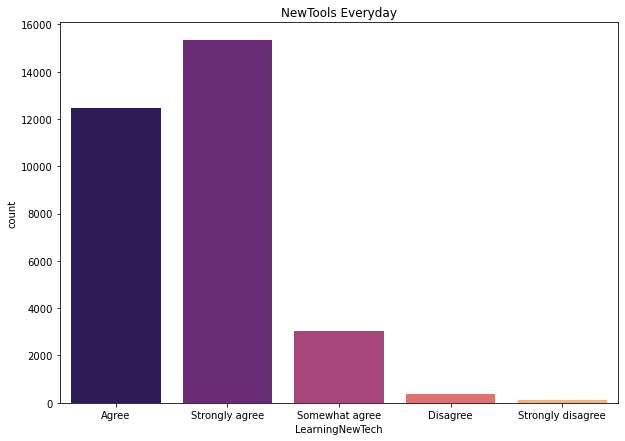

In [431]:
#Is Software Industry Evolving Everday and needs a life time learner ??
plt.figure(figsize=(10,7))
sns.countplot(x=df['LearningNewTech'] , palette='magma').set(title='NewTools Everyday')
plt.show()
#Yes we all agree on that :)

In [405]:
def text_preprocessing(df,column_name):
    freq_table={}
    for idx in df[column_name].dropna(): #each row in our dataset
        
        for language_name in idx.split(';'): # we will split each sentence to seperate the languages that our clients use 
            freq_table[language_name.strip()] = 1 + freq_table.get(language_name.strip() , 0) # store the count of our languages in a freq hashmap
    
    freq_table = {k: v for k, v in sorted(freq_table.items(), key=lambda item: item[1] , reverse=True)} # we can sort our dic values by count to make our plot looks better
    
    return freq_table        

In [204]:
usedLanguages_FreqTable=text_preprocessing(df,'HaveWorkedLanguage')
print(usedLanguages_FreqTable)

{'JavaScript': 22875, 'SQL': 18754, 'Java': 14524, 'C#': 12476, 'Python': 11704, 'PHP': 10290, 'C++': 8155, 'C': 6974, 'TypeScript': 3488, 'Ruby': 3324, 'Swift': 2368, 'Objective-C': 2349, 'VB.NET': 2273, 'Assembly': 1823, 'R': 1634, 'Perl': 1585, 'VBA': 1574, 'Matlab': 1569, 'Go': 1557, 'Scala': 1309, 'Groovy': 1193, 'CoffeeScript': 1192, 'Visual Basic 6': 1071, 'Lua': 1039, 'Haskell': 649, 'F#': 457, 'Rust': 416, 'Clojure': 391, 'Elixir': 380, 'Smalltalk': 327, 'Erlang': 281, 'Common Lisp': 273, 'Dart': 145, 'Julia': 138, 'Hack': 107}


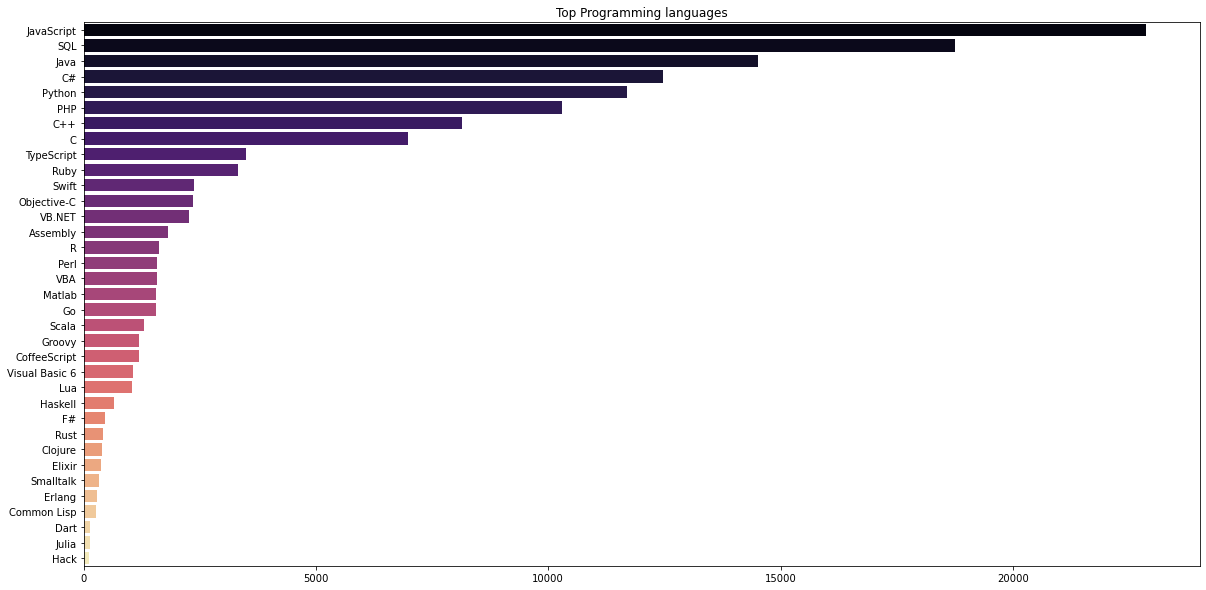

In [209]:
plt.figure(figsize=(20,10))
sns.barplot(y=list(usedLanguages_FreqTable.keys()) , x=list(usedLanguages_FreqTable.values()) , palette='magma').set(title='Top Programming languages')
plt.show()
## We see that java script is getting famous and c++,c getting too old

In [418]:
wantworkLanguage=text_preprocessing(df,'WantWorkLanguage')

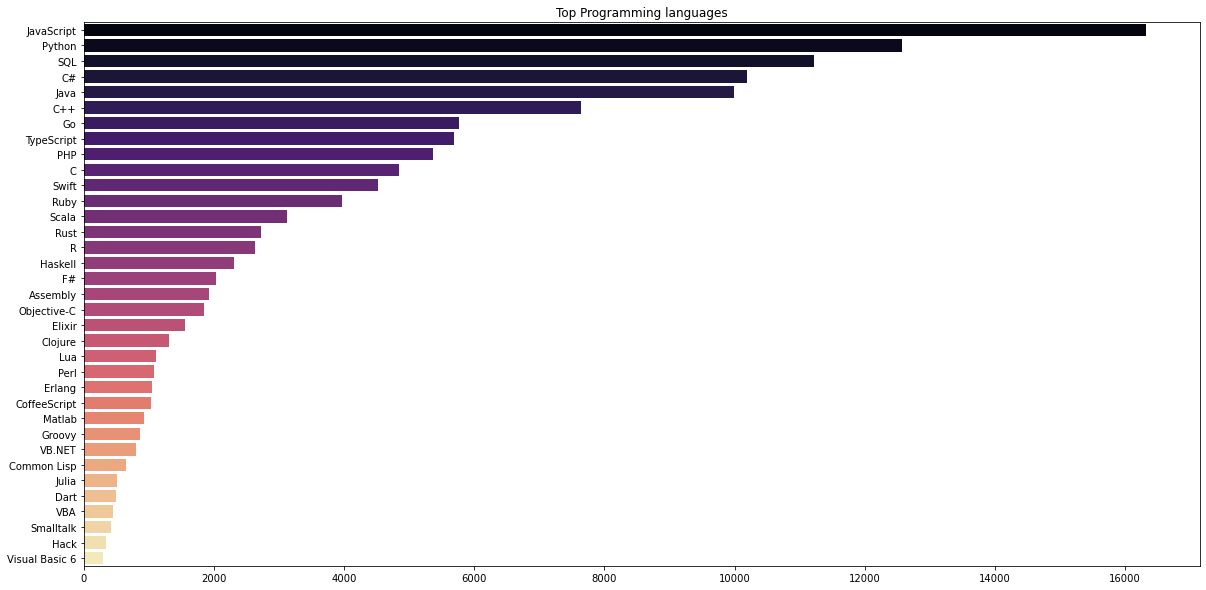

In [419]:
plt.figure(figsize=(20,10))
sns.barplot(y=list(wantworkLanguage.keys()) , x=list(wantworkLanguage.values()) , palette='magma').set(title='Top Programming languages')
plt.show()
#People trying to move on python more than java and complex languages 

In [420]:
edu_types=text_preprocessing(df,'EducationTypes')

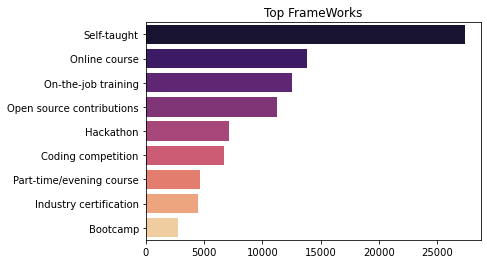

In [421]:
sns.barplot(y=list(edu_types.keys()), x=list(edu_types.values()) , palette='magma').set(title='Top FrameWorks')
plt.show()
# Intresting that we find most of our developers are self taught
#Lets find out how people teach themselfes

In [422]:
how_selfTaught=text_preprocessing(df,'SelfTaughtTypes')

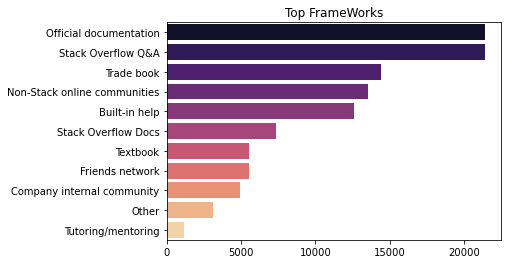

In [423]:
sns.barplot(y=list(how_selfTaught.keys()), x=list(how_selfTaught.values()) , palette='magma').set(title='Top FrameWorks')
plt.show()
#It seems that most people tend to look at the official documentation and look for problems on stackoverflow

In [212]:
usedFrameWork_freqTable=text_preprocessing(df,'HaveWorkedFramework')
print(usedFrameWork_freqTable)

{'Node.js': 9522, 'AngularJS': 8962, '.NET Core': 6763, 'React': 3953, 'Cordova': 2232, 'Firebase': 1979, 'Xamarin': 1675, 'Hadoop': 1148, 'Spark': 953}


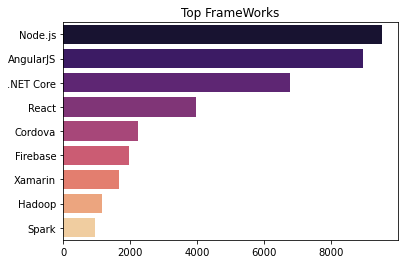

In [232]:
sns.barplot(y=list(usedFrameWork_freqTable.keys()), x=list(usedFrameWork_freqTable.values()) , palette='magma').set(title='Top FrameWorks')
plt.show()
#We see that Node.js is very famous framwork

In [47]:
usedDatabase_freqTable=text_preprocessing(df,'HaveWorkedDatabase')

In [48]:
usedDatabase_freqTable

{'MySQL': 16375,
 'SQL Server': 11358,
 'SQLite': 7838,
 'PostgreSQL': 7815,
 'MongoDB': 6192,
 'Oracle': 4874,
 'Redis': 4143,
 'Cassandra': 906}

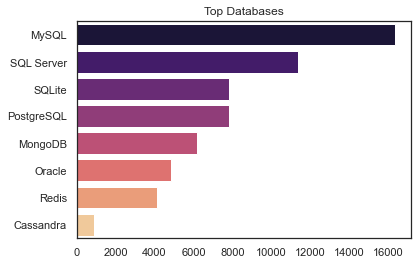

In [49]:
sns.barplot(y=list(usedDatabase_freqTable.keys()), x=list(usedDatabase_freqTable.values()) , palette='magma').set(title='Top Databases')
plt.show()
#MySQL is top database

In [413]:
used_platforms=text_preprocessing(df,'HaveWorkedPlatform')

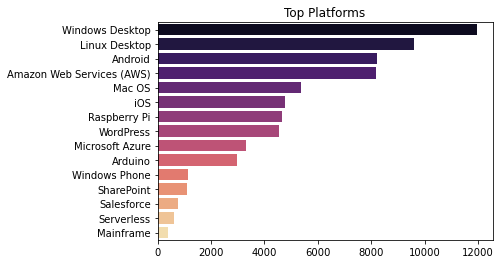

In [414]:
sns.barplot(y=list(used_platforms.keys()), x=list(used_platforms.values()) , palette='magma').set(title='Top Platforms')
plt.show()

Data wrangling

In [14]:
print(df.shape)
#The Data consists of 154 feature and 51392 record
df.columns

(51392, 154)


Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [21]:
df.columns[df.isna().sum()==0]
#There are 7 columns that have no null values from 154 columns thats not good

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [23]:
print(len(df.columns[df.isna().mean()>0.5]))
df.columns[df.isna().mean()>0.5]
#We have 53 columns with missing data more than 50% that mean we should drop null values to be able to 
# feed our predictive model

53


Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'HoursPerWeek',
       'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept',
       'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation',
       'AssessJobOffice', 'AssessJobCommute', 'AssessJobRemote',
       'AssessJobLeaders', 'AssessJobProfDevel', 'AssessJobDiversity',
       'AssessJobProduct', 'AssessJobFinances', 'JobProfile', 'ResumePrompted',
       'LearnedHiring', 'Currency', 'Overpaid', 'EducationImportant',
       'TimeAfterBootcamp', 'CousinEducation', 'HaveWorkedFramework',
       'WantWorkFramework', 'WantWorkDatabase', 'MetricAssess',
       'InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers',
       'InfluenceTechStack', 'InfluenceDeptTech', 'InfluenceVizTools',
       'Influe

In [28]:
print(len(df.columns[df.isna().mean()>0.9]))
df.columns[df.isna().mean()>0.9]
#There is 13 columns with null values more than 90% that we should drop bec it will dec our model performance

13


Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'],
      dtype='object')

In [262]:
df2=df.copy()
df2.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
#We will create a model that predicts the salary of our people so we sould drop nan values in our Salary
df2=df2.dropna(subset=['Salary'],axis=0)

In [193]:
df2.shape

(12891, 154)

In [264]:
df2.drop(['Respondent','ExpectedSalary'] ,axis=1 ,inplace=True) #Drop these columns as they contain useless data for our predictive model
Float_df=df2.select_dtypes(include='float')
Float_df.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
2,8.0,9.0,NaN,8.0,113750.0
14,8.0,8.0,NaN,8.0,100000.0
17,9.0,8.0,NaN,8.0,130000.0
18,5.0,3.0,NaN,NaN,82500.0
22,8.0,9.0,NaN,8.0,100764.0


Feature Selection

In [258]:
from sklearn.feature_selection import SelectKBest,r_regression,f_regression,mutual_info_regression,chi2
from sklearn.preprocessing import LabelEncoder

In [265]:
CatFeatures=df2.select_dtypes(include='object')

In [266]:
CatFeatures.columns

Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType',
       ...
       'StackOverflowBetter', 'StackOverflowWhatDo', 'StackOverflowMakeMoney',
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers'],
      dtype='object', length=147)

In [267]:
le=LabelEncoder()
Encoded_df=CatFeatures.apply(le.fit_transform)
#We will apply label encoder on categorical features to see how strong is the corelation between the our features and our Target yhat 

In [268]:
df_Merged=pd.concat([Encoded_df,Float_df],axis=1)
df_Merged.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
2,0,3,126,1,0,0,8,4,2,6,...,51,2,0,1,0,8.0,9.0,NaN,8.0,113750.0
14,0,2,126,1,0,6,6,2,5,6,...,51,2,0,1,0,8.0,8.0,NaN,8.0,100000.0
17,0,3,127,3,0,0,8,2,0,6,...,48,1,0,1,0,9.0,8.0,NaN,8.0,130000.0
18,0,2,127,1,0,0,8,0,2,6,...,55,5,5,5,5,5.0,3.0,NaN,NaN,82500.0
22,0,0,55,1,0,0,6,0,6,5,...,51,3,2,2,0,8.0,9.0,NaN,8.0,100764.0


ANOVA Feature Selection

In [269]:
X=df_Merged.drop('Salary',axis=1)
y=df_Merged['Salary']

In [270]:
#We will impute the missing values with the mean of the columns to feed our machinelearning algorithm
for col in X.columns:
    X[col].fillna(X[col].mean(),inplace=True)

In [271]:
X.isna().sum()

Professional                 0
ProgramHobby                 0
Country                      0
University                   0
EmploymentStatus             0
                            ..
InterestedAnswers            0
CareerSatisfaction           0
JobSatisfaction              0
HoursPerWeek                 0
StackOverflowSatisfaction    0
Length: 151, dtype: int64

In [272]:
df['Salary'].mean()

56298.48064062976

In [273]:
# SelectKbest from sklearn work on many score function as our task is a Regression so we will choose 
# f_regression which is basiclly pearsons correlation 
fs_pearsons=SelectKBest(score_func=f_regression , k='all') 
fs_pearsons.fit(X,y)


c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


SelectKBest(k='all', score_func=<function f_regression at 0x000001CBAB4C7C10>)

In [274]:
def Selected_features(scores,feature_names,Threshold):
    #Function that returns a List with the selected features by sklearn feature selection method
    res=[]
    for i in range(len(scores)):
        if scores[i]>Threshold: # If the feature score exceeded the given threshold then we will take it
            res.append(feature_names[i])
    return res        

In [335]:
pearsons_features=Selected_features(fs_pearsons.scores_,fs_pearsons.feature_names_in_,100)

In [276]:
fs_mutualInfo=SelectKBest(score_func=mutual_info_regression,k='all')
fs_mutualInfo.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001CBAB43F4C0>)

In [326]:
mutual_Info_Features=Selected_features(fs_mutualInfo.scores_,fs_mutualInfo.feature_names_in_,0.04)

In [355]:
mutual_Info_Features

['Country',
 'University',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'PronounceGIF',
 'ImportantBenefits',
 'JobProfile',
 'Currency',
 'Overpaid',
 'HaveWorkedLanguage',
 'IDE',
 'HighestEducationParents',
 'Race']

In [353]:
len(Selected_features(fs_mutualInfo.scores_,fs_mutualInfo.feature_names_in_,0.04))

18

Lets split our data

In [364]:
XF=df_Merged[mutual_Info_Features].values
#Splitting the data to avoid over fitting and testing the data to see how our model will generalize any data
x_train,x_test,y_train,y_test=train_test_split(XF,y.values,test_size=0.3,random_state=42)

Lets build Some machine learning models

In [365]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
ypred_xgb=xgb.predict(x_test)

In [369]:
MSE=metrics.mean_squared_error(y_test,ypred_xgb)
r2_score=metrics.r2_score(y_test,ypred_xgb)
print('mean squared error =',MSE)
print('r2_score =',np.round(r2_score,3))

mean squared error = 423806177.88147527
r2_score = 0.726


In [349]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
ypred_RF=RF.predict(x_test)

In [370]:
MSE=metrics.mean_squared_error(y_test,ypred_RF)
r2_score=metrics.r2_score(y_test,ypred_RF)
print('mean squared error =',MSE)
print('r2_score =',np.round(r2_score,3))

mean squared error = 466462420.56612843
r2_score = 0.699


Conclusion:

Overall the data is a survey that stackoverflow make every year for developers , There is great insights in the data and many ideas one 
is to try to analyze the survey over the years and see what languages re getting old and what should new devlopers learn same for
data bases and frameworks etc.. .But the quality of the data was bad for ML it contains to many null values which required alot of work
and it seemed the results werent accurate as our model performance was low.